## Setup

In [2]:
import cv2
import os

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm # Displays a progress bar
import os
import urllib.request as urlreq

import torch
import os
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchsummary import summary
from torchvision import datasets, transforms
from torch.utils.data import Dataset, Subset, DataLoader, random_split

## Loading Dataset

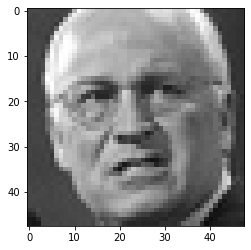

In [19]:
# LOADING TRAINING SET
training_data = [] 

path = 'images/train/angry'
for img in os.listdir(path):
    pic = cv2.imread(os.path.join(path,img))
    training_data.append([pic])
    
path = 'images/train/disgust'
for img in os.listdir(path):
    pic = cv2.imread(os.path.join(path,img))
    training_data.append([pic])
    
path = 'images/train/fear'
for img in os.listdir(path):
    pic = cv2.imread(os.path.join(path,img))
    training_data.append([pic])

path = 'images/train/happy'
for img in os.listdir(path):
    pic = cv2.imread(os.path.join(path,img))
    training_data.append([pic])
    
path = 'images/train/neutral'
for img in os.listdir(path):
    pic = cv2.imread(os.path.join(path,img))
    training_data.append([pic])  

path = 'images/train/sad'
for img in os.listdir(path):
    pic = cv2.imread(os.path.join(path,img))
    training_data.append([pic])

path = 'images/train/surprise'
for img in os.listdir(path):
    pic = cv2.imread(os.path.join(path,img))
    training_data.append([pic])
    
trainingSet = np.array(training_data)


#LOADING VALIDATION SET    
validation_data = []

path = 'images/validation/angry'
for img in os.listdir(path):
    pic = cv2.imread(os.path.join(path,img))
    validation_data.append([pic])
    
path = 'images/validation/disgust'
for img in os.listdir(path):
    pic = cv2.imread(os.path.join(path,img))
    validation_data.append([pic])
    
path = 'images/validation/fear'
for img in os.listdir(path):
    pic = cv2.imread(os.path.join(path,img))
    validation_data.append([pic])

path = 'images/validation/happy'
for img in os.listdir(path):
    pic = cv2.imread(os.path.join(path,img))
    validation_data.append([pic])
    
path = 'images/validation/neutral'
for img in os.listdir(path):
    pic = cv2.imread(os.path.join(path,img))
    validation_data.append([pic])  

path = 'images/validation/sad'
for img in os.listdir(path):
    pic = cv2.imread(os.path.join(path,img))
    validation_data.append([pic])

path = 'images/validation/surprise'
for img in os.listdir(path):
    pic = cv2.imread(os.path.join(path,img))
    validation_data.append([pic])
    
validationSet = np.array(validation_data)

# LOADING THE TEST SET
testSet = Subset(trainingSet, range(7205))

plt.imshow(testSet[3].reshape(48,48,3))


## Facial Landmark Detector

In [70]:
def get_landmarks(img_name):
    img = cv2.imread(img_name)
    
    # save face detection algorithm's url in haarcascade_url variable
    haarcascade_url = "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_alt2.xml"

    # save face detection algorithm's name as haarcascade
    haarcascade = "haarcascade_frontalface_alt2.xml"

    # chech if file is in working directory
    if (haarcascade not in os.listdir(os.curdir)):
        # download file from url and save locally as haarcascade_frontalface_alt2.xml, < 1MB
        urlreq.urlretrieve(haarcascade_url, haarcascade)
        print("File downloaded")

    # create an instance of the Face Detection Cascade Classifier
    detector = cv2.CascadeClassifier(haarcascade)

    # Detect faces using the haarcascade classifier on the "grayscale image"
    faces = detector.detectMultiScale(img)

    if len(faces) == 0:
        faces = np.array([[0,0,48,48]])
        
    img = cv2.imread(img_name)
    LBFmodel_url = "https://github.com/kurnianggoro/GSOC2017/raw/master/data/lbfmodel.yaml"

    # save facial landmark detection model's name as LBFmodel
    LBFmodel = "lbfmodel.yaml"

    # check if file is in working directory
    if (LBFmodel not in os.listdir(os.curdir)):
        # download picture from url and save locally as lbfmodel.yaml, < 54MB
        urlreq.urlretrieve(LBFmodel_url, LBFmodel)
        print("File downloaded")

    # create an instance of the Facial landmark Detector with the model
    landmark_detector  = cv2.face.createFacemarkLBF()
    landmark_detector.loadModel(LBFmodel)

    # Detect landmarks on "image_gray"
    _, landmarks = landmark_detector.fit(img, faces)

    for landmark in landmarks:
        for x,y in landmark[0]:
            # display landmarks on "image_cropped"
            # with white colour in BGR and thickness 1
            cv2.circle(img, (int(x), int(y)), 0, (255, 0, 0), 1)
    plt.axis("off")
    plt.imshow(img)
    
    return landmarks


(48, 48, 3)


(array([[[ 1.2230142, 13.62515  ],
         [ 1.89881  , 18.844763 ],
         [ 2.6908202, 23.967827 ],
         [ 3.9406798, 28.959635 ],
         [ 5.966726 , 33.498302 ],
         [ 9.049062 , 37.63056  ],
         [13.079766 , 40.910652 ],
         [17.484001 , 42.95748  ],
         [21.863573 , 43.458885 ],
         [26.17455  , 42.80611  ],
         [29.923248 , 40.31472  ],
         [33.35249  , 36.907696 ],
         [35.963734 , 32.480293 ],
         [37.89558  , 27.733889 ],
         [39.32698  , 22.708118 ],
         [40.244656 , 17.764505 ],
         [40.65445  , 12.779195 ],
         [ 6.4292955, 12.578613 ],
         [ 9.458642 , 10.935528 ],
         [13.207218 , 11.015214 ],
         [16.718914 , 12.285414 ],
         [20.159058 , 13.706006 ],
         [24.428783 , 13.711701 ],
         [27.43565  , 12.293816 ],
         [30.642622 , 10.967    ],
         [34.034603 , 10.476006 ],
         [36.766457 , 12.019502 ],
         [22.426231 , 15.924629 ],
         [22.590763 

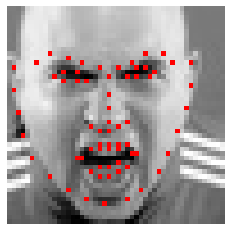

In [71]:
get_landmarks("22.jpg")

In [16]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_face_mesh = mp.solutions.face_mesh

# For static images:
IMAGE_FILES = ["22.jpg"]
drawing_spec = mp_drawing.DrawingSpec(thickness=0, circle_radius=0)
with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=1,
    refine_landmarks=True,
    min_detection_confidence=0.1) as face_mesh:
      for idx, file in enumerate(IMAGE_FILES):
        image = cv2.imread(file)
        # Convert the BGR image to RGB before processing.
        results = face_mesh.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        # Print and draw face mesh landmarks on the image.
        if not results.multi_face_landmarks:
              continue
        annotated_image = image.copy()
        for face_landmarks in results.multi_face_landmarks:
              print('face_landmarks:', face_landmarks)
              mp_drawing.draw_landmarks(
                  image=annotated_image,
                  landmark_list=face_landmarks,
                  connections=mp_face_mesh.FACEMESH_TESSELATION,
                  landmark_drawing_spec=None,
                  connection_drawing_spec=mp_drawing_styles
                  .get_default_face_mesh_tesselation_style())
              mp_drawing.draw_landmarks(
                  image=annotated_image,
                  landmark_list=face_landmarks,
                  connections=mp_face_mesh.FACEMESH_CONTOURS,
                  landmark_drawing_spec=None,
                  connection_drawing_spec=mp_drawing_styles
                  .get_default_face_mesh_contours_style())
              mp_drawing.draw_landmarks(
                  image=annotated_image,
                  landmark_list=face_landmarks,
                  connections=mp_face_mesh.FACEMESH_IRISES,
                  landmark_drawing_spec=None,
                  connection_drawing_spec=mp_drawing_styles
                  .get_default_face_mesh_iris_connections_style())
        cv2.imwrite(str(idx) + '.png', annotated_image)

face_landmarks: landmark {
  x: 0.4472334682941437
  y: 0.6205528974533081
  z: -0.059280626475811005
}
landmark {
  x: 0.4589700996875763
  y: 0.5606693625450134
  z: -0.16550064086914062
}
landmark {
  x: 0.4557661712169647
  y: 0.5807110071182251
  z: -0.07921683043241501
}
landmark {
  x: 0.42820996046066284
  y: 0.44378578662872314
  z: -0.1449136584997177
}
landmark {
  x: 0.45867016911506653
  y: 0.5282900333404541
  z: -0.1802585870027542
}
landmark {
  x: 0.4569692015647888
  y: 0.48116692900657654
  z: -0.1753712296485901
}
landmark {
  x: 0.4509636163711548
  y: 0.3581550717353821
  z: -0.11881903558969498
}
landmark {
  x: 0.2325296849012375
  y: 0.32434147596359253
  z: -0.007598234806209803
}
landmark {
  x: 0.44904789328575134
  y: 0.2780243158340454
  z: -0.11551661044359207
}
landmark {
  x: 0.4484604001045227
  y: 0.2355872392654419
  z: -0.12972143292427063
}
landmark {
  x: 0.4439396560192108
  y: 0.04995039105415344
  z: -0.13159702718257904
}
landmark {
  x: 0.447

## Model